### Price Prediction - Cars

### Importing dependencies

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### Data Collection ; Processing

In [10]:
# load dataset
car_dataset = pd.read_csv("../data/car data.csv")

In [11]:
# show dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
# number of rows and columns
car_dataset.shape

(301, 9)

In [13]:
# information extraction
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
# checking missing values 
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
# checking the distribution of categorical data
print("Fuel type")
print(car_dataset.Fuel_Type.value_counts())
print("Seller type")
print(car_dataset.Seller_Type.value_counts())
print("Transission type")
print(car_dataset.Transmission.value_counts())

Fuel type
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller type
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transission type
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [16]:
# encoding categorical data

# fuel type
car_dataset.replace({"Fuel_Type":{"Petrol": 0, "Diesel": 1, "CNG": 2}}, inplace = True)

# seller type
car_dataset.replace({"Seller_Type":{"Dealer": 0, "Individual": 1}}, inplace = True)

# transmission type
car_dataset.replace({"Transmission":{"Manual": 0, "Automatic": 1}}, inplace = True)

In [17]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [18]:
# Features and labels
X = car_dataset.drop(["Car_Name", "Selling_Price"], axis = 1)
Y = car_dataset["Selling_Price"]

In [19]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

### Train and Test data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [21]:
print(X_train)
print(Y_test)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
204  2015          4.430       28282          0            0             0   
249  2016          7.600       17000          0            0             0   
277  2015         13.600       21780          0            0             0   
194  2008          0.787       50000          0            1             0   
244  2013          9.400       49000          1            0             0   
..    ...            ...         ...        ...          ...           ...   
75   2015          6.800       36000          0            0             0   
22   2011          8.010       50000          0            0             1   
72   2013         18.610       56001          0            0             0   
15   2016         10.790       43000          1            0             0   
168  2013          0.730       12000          0            1             0   

     Owner  
204      0  
249      0  
277      0  
194      0 

### Linear Regression Model Training


In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation

In [24]:
# Prediction on training data
train_prediction = model.predict(X_train)

In [25]:
# R squared error on training data
error_score = metrics.r2_score(Y_train, train_prediction)
print(error_score)

0.8799451660493709


### Actual prices and predicted prices visualization

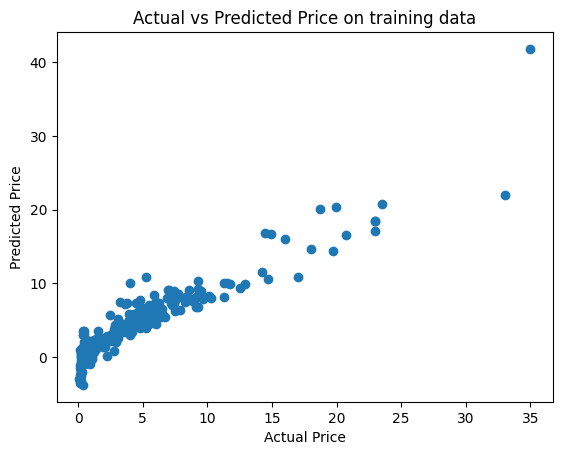

In [27]:
# training data
plt.scatter(Y_train, train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price on training data")
plt.show()

In [28]:
# prediction on test data
test_prediction = model.predict(X_test)

In [29]:
# r2 error
test_error_score = metrics.r2_score(Y_test, test_prediction)
print(test_error_score)

0.8365766715026535


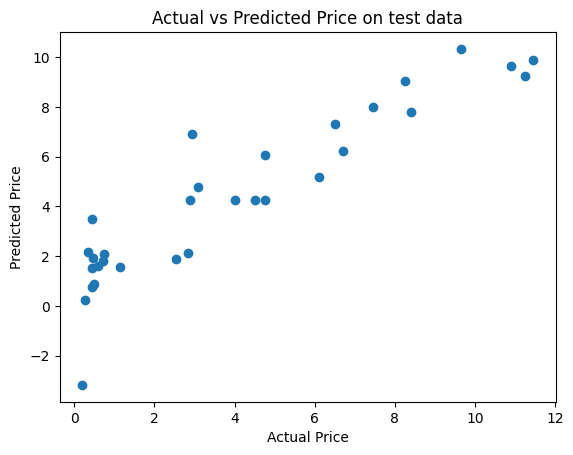

In [30]:
# plotting actual vs prediction on test data
plt.scatter(Y_test, test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price on test data")
plt.show()

### Model training on Lasso Regression

In [31]:
model = Lasso()

In [32]:
model.fit(X_train, Y_train)

Lasso()

In [33]:
# prediction on training data
training_prediction = model.predict(X_train)

In [34]:
# r2 error score on training data
training_error_score = metrics.r2_score(Y_train, training_prediction)
print(training_error_score)

0.8427856123435794


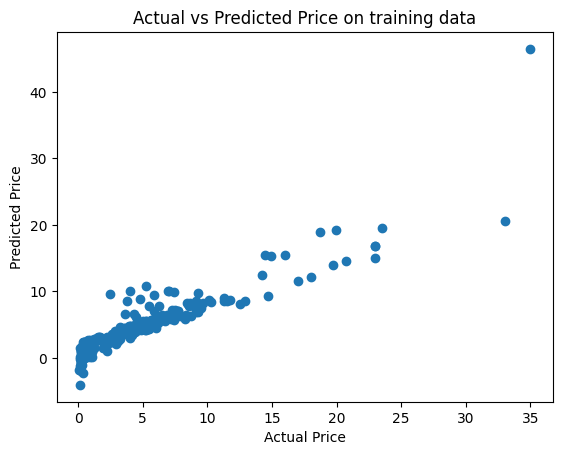

In [35]:
# training data plot
plt.scatter(Y_train, training_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price on training data")
plt.show()

In [36]:
# prediction on test data
training_prediction = model.predict(X_test)

In [37]:
# r2 error score on test data
test_error_score = metrics.r2_score(Y_test, test_prediction)
print(test_error_score)

0.8365766715026535


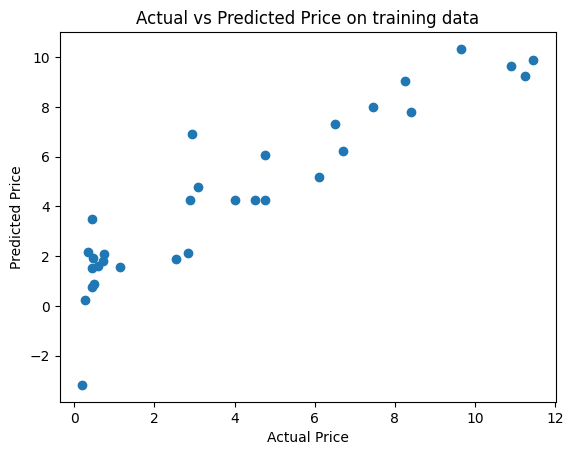

In [38]:
# test data plot
plt.scatter(Y_test, test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price on training data")
plt.show()